<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: HDB Resale Predictor (Part 1)
## By 39 SIR

## 1. Introduction

*Insert text*

## 2. Problem Statement

*Insert text*

## 3. Data Cleaning

### a. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### b. Import dataset

In [2]:
# Import data
hdb = pd.read_csv('./datasets/train.csv', low_memory=False)

# Set display options
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)

### c. Lowercase all column headers

In [3]:
# Set all keys to lowercase
hdb.columns = hdb.columns.str.lower()
hdb.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,...,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,...,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,...,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,...,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,...,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,...,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [4]:
df = hdb[["resale_price", "id"]]
df.corr()

,resale_price,id
resale_price,1.000000,0.521504
id,0.521504,1.000000


In [5]:
# Check size of dataset. 
# There are 150634 rows and 78 columns of data.

hdb.shape

(150634, 78)

### d. Check for null values

In [6]:
# Identify columns with null values
# Null values found in 'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km'
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [7]:
# Null values indicate 0 malls within 500m, 1km, or 2km

hdb[['mall_nearest_distance', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km']].head()

,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km
0,1094.090418,NaN,NaN,7.0
1,866.941448,NaN,1.0,3.0
2,1459.579948,NaN,NaN,4.0
3,950.175199,NaN,1.0,4.0
4,729.771895,NaN,1.0,2.0


In [8]:
# Null values indicate 0 hawker within 500m, 1km, or 2km

hdb[['hawker_nearest_distance','hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].head()

,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km
0,154.753357,1.0,3.0,13.0
1,640.151925,NaN,1.0,7.0
2,1762.082341,NaN,NaN,1.0
3,726.215262,NaN,1.0,9.0
4,1540.151439,NaN,NaN,1.0


In [9]:
# Based on deductive imputation, it's deduced that those null values indicate no mall or hawker in the vicinity.
# Thus, we're replacing those null values with '0' using np.replace
hdb[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']] = hdb[['mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].replace(np.nan, 0)

In [10]:
# There are 829 rows with no data for mall_nearest_distance
hdb['mall_nearest_distance'].isnull().sum()

829

In [11]:
# Will drop rows as it is insignificant (0.55%) for total dataset. Remaining 149805 rows.
hdb.dropna(inplace=True)

### e. Check for data types

In [12]:
# Sort categorical and continuous/discrete variables
categories = []
numerical = []

for name, dtype in hdb.dtypes.items():
    if dtype == 'object':
        categories.append(name)
    elif dtype == 'float64' or dtype == 'int64':
        numerical.append(name)

In [13]:
# Retrieve categorical variables
print(categories)

['tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'full_flat_type', 'address', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'postal', 'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name']


In [14]:
#  Examine display of categorical variables
# Residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion are Y/N
# Postal will be considered as categorical
hdb[categories].head()

,tranc_yearmonth,town,flat_type,block,street_name,storey_range,flat_model,full_flat_type,address,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,postal,planning_area,mrt_name,bus_stop_name,pri_sch_name,sec_sch_name
0,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,Model A,4 ROOM Model A,"3B, UPP BOON KENG RD",Y,N,N,N,N,382003,Kallang,Kallang,Blk 3B,Geylang Methodist School,Geylang Methodist School
1,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,Improved,5 ROOM Improved,"153, BISHAN ST 13",Y,N,N,N,N,570153,Bishan,Bishan,BLK 151A MKT,Kuo Chuan Presbyterian Primary School,Kuo Chuan Presbyterian Secondary School
2,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,Apartment,EXECUTIVE Apartment,"289B, BT BATOK ST 25",Y,N,N,N,N,651289,Bukit Batok,Bukit Batok,Blk 289E,Keming Primary School,Yusof Ishak Secondary School
3,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,Model A,4 ROOM Model A,"232, BISHAN ST 22",Y,Y,N,N,N,570232,Bishan,Bishan,Opp Bishan Nth Shop Mall,Catholic High School,Catholic High School
4,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,Simplified,4 ROOM Simplified,"876, YISHUN ST 81",Y,N,N,N,N,760876,Yishun,Khatib,Blk 873,Naval Base Primary School,Orchid Park Secondary School


In [15]:
# Check data to confirm that columns can be binarised
# Residential only has one value. To drop this column and binarise the rest.

print(hdb['residential'].value_counts())
print(hdb['commercial'].value_counts())
print(hdb['market_hawker'].value_counts())
print(hdb['multistorey_carpark'].value_counts())
print(hdb['precinct_pavilion'].value_counts())

Y    149805
Name: residential, dtype: int64
N    121053
Y     28752
Name: commercial, dtype: int64
N    149790
Y        15
Name: market_hawker, dtype: int64
N    149763
Y        42
Name: multistorey_carpark, dtype: int64
N    149692
Y       113
Name: precinct_pavilion, dtype: int64


In [16]:
# Convert commercial, market_hawker, multistorey_carpark, and precinct_pavilion to binaries

def binarise(df,column):
    df[column] = df[column].map({'Y': 1, 'N': 0})

binarise(hdb,'residential')
binarise(hdb,'commercial')
binarise(hdb,'market_hawker')
binarise(hdb,'multistorey_carpark')
binarise(hdb,'precinct_pavilion')

In [17]:
# Check that the variables have been binarised

hdb[categories].head()

,tranc_yearmonth,town,flat_type,block,street_name,storey_range,flat_model,full_flat_type,address,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,postal,planning_area,mrt_name,bus_stop_name,pri_sch_name,sec_sch_name
0,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,Model A,4 ROOM Model A,"3B, UPP BOON KENG RD",1,0,0,0,0,382003,Kallang,Kallang,Blk 3B,Geylang Methodist School,Geylang Methodist School
1,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,Improved,5 ROOM Improved,"153, BISHAN ST 13",1,0,0,0,0,570153,Bishan,Bishan,BLK 151A MKT,Kuo Chuan Presbyterian Primary School,Kuo Chuan Presbyterian Secondary School
2,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,Apartment,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1,0,0,0,0,651289,Bukit Batok,Bukit Batok,Blk 289E,Keming Primary School,Yusof Ishak Secondary School
3,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,Model A,4 ROOM Model A,"232, BISHAN ST 22",1,1,0,0,0,570232,Bishan,Bishan,Opp Bishan Nth Shop Mall,Catholic High School,Catholic High School
4,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,Simplified,4 ROOM Simplified,"876, YISHUN ST 81",1,0,0,0,0,760876,Yishun,Khatib,Blk 873,Naval Base Primary School,Orchid Park Secondary School


In [18]:
# Drop the columns 'id',residential', 'price_per_sqft'
clean = hdb.drop(columns=['id','residential','price_per_sqft']).reset_index(drop=True)

In [19]:
# Final data set has 149805 rows and 75 variables
clean.shape

(149805, 75)

### f. Interaction term

As HDB mentioned that "proximity to city or town centre" is one of the "factors that impact the market value of a new flat" (HDB, 2023), we are creating an interaction term, **"town_proxy"**, to determine the **squared distance** between the flat and the Singapore River.

The relative distance is derived using the Pythagoras Theorem as follows:

**c^2 = a^2 + b^2**

In this case,

**town_proxy = ((latitude - town_lat) ** 2) + ((longitude - town_long) ** 2) ** 0.5**

Given that the latitude and longitude of Singapore River is as follows:

In [20]:
town_lat = 1.290160
town_long = 103.852000

In [21]:
hdb['town_proxy'] = ((hdb['latitude'] - town_lat) ** 2) + ((hdb['longitude'] - town_long) ** 2)

## 4. Exploratory Data Analysis

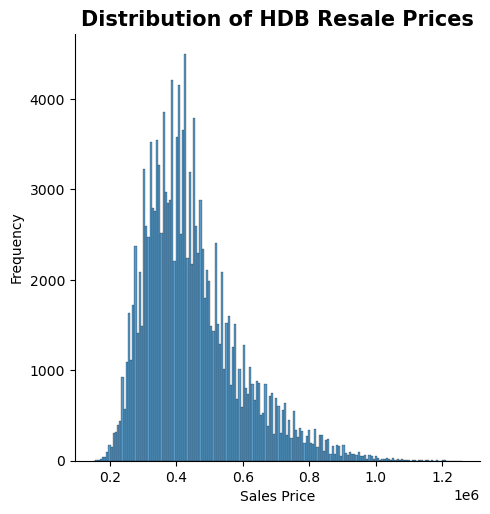

In [22]:
# Examine spread of resale_price
# Plot histogram
sns.displot(clean,x='resale_price')

# Changing x and y labels
plt.xlabel('Sales Price')
plt.ylabel('Frequency')

# Chart title
plt.title('Distribution of HDB Resale Prices', fontsize=15, fontweight='bold')
plt.show()

In [23]:
# Identify outliers

print("Min Resale: "+str(clean['resale_price'].min()))
print("Max Resale: "+str(clean['resale_price'].max()))
print("Mean Resale: "+str(clean['resale_price'].max()))

q3, q1 = np.percentile(clean['resale_price'], [75 ,25])
iqr = q3 - q1
lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

print("Lower limit is: "+str(lower_lim))
print("Upper limit is:" +str(upper_lim))

# Find upper outliers - i.e. resale prices above 781000
# There are 4196 rows
upper_outliers = clean[clean['resale_price']>781000]
upper_outliers.shape

Min Resale: 150000.0
Max Resale: 1258000.0
Mean Resale: 1258000.0
Lower limit is: 85000.0
Upper limit is:781000.0


(4916, 75)

In [24]:
# Identify co-linearity for continuous/discrete variables
## Taking reference from Alice's notebook

check_area = clean[['resale_price','floor_area_sqm','floor_area_sqft']]

check_storey = clean[['resale_price','mid_storey','lower','upper','mid']]

check_flatssold = clean[['resale_price','1room_sold', '2room_sold','3room_sold', '4room_sold', 
                         '5room_sold', 'exec_sold', 'multigen_sold','studio_apartment_sold']]

In [25]:
check_area.corr()

,resale_price,floor_area_sqm,floor_area_sqft
resale_price,1.000000,0.656776,0.656776
floor_area_sqm,0.656776,1.000000,1.000000
floor_area_sqft,0.656776,1.000000,1.000000


In [26]:
check_storey.corr()

,resale_price,mid_storey,lower,upper,mid
resale_price,1.000000,0.351795,0.351026,0.352152,0.351795
mid_storey,0.351795,1.000000,0.999414,0.999412,1.000000
lower,0.351026,0.999414,1.000000,0.997654,0.999414
upper,0.352152,0.999412,0.997654,1.000000,0.999412
mid,0.351795,1.000000,0.999414,0.999412,1.000000


In [27]:
check_flatssold.corr()

,resale_price,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold
resale_price,1.000000,-0.039488,-0.146455,-0.411948,0.088682,0.360818,0.339819,0.037608,0.041589
1room_sold,-0.039488,1.000000,-0.003536,-0.012669,-0.025829,-0.018381,-0.007289,-0.000495,-0.001936
2room_sold,-0.146455,-0.003536,1.000000,0.052072,-0.123623,-0.116251,-0.047019,-0.003199,0.051830
3room_sold,-0.411948,-0.012669,0.052072,1.000000,-0.293116,-0.399753,-0.163100,-0.010533,0.006373
4room_sold,0.088682,-0.025829,-0.123623,-0.293116,1.000000,-0.050565,-0.297222,-0.021018,0.027140
5room_sold,0.360818,-0.018381,-0.116251,-0.399753,-0.050565,1.000000,-0.161198,-0.016628,-0.039260
exec_sold,0.339819,-0.007289,-0.047019,-0.163100,-0.297222,-0.161198,1.000000,-0.006593,-0.025761
multigen_sold,0.037608,-0.000495,-0.003199,-0.010533,-0.021018,-0.016628,-0.006593,1.000000,-0.001751
studio_apartment_sold,0.041589,-0.001936,0.051830,0.006373,0.027140,-0.039260,-0.025761,-0.001751,1.000000


In [42]:
hdb.to_csv('Project 2.csv')